<a href="https://colab.research.google.com/github/Ranikumari08/Protfolio/blob/main/Heart_Diseases_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#load data
from  google.colab import files
uploaded = files.upload()

Saving merged_heart_disease_data.csv to merged_heart_disease_data.csv


In [ ]:
#store the data into a varible
df=pd.read_csv('merged_heart_disease_data.csv')


#Print the first 10 rows of  data
df.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


In [ ]:
#Get the shape (rows and columns) of data
df.shape

(180, 15)

In [ ]:
#Count the empty values in each column
df.isna().sum()

,0
patient_id,0
slope_of_peak_exercise_st_segment,0
thal,0
resting_blood_pressure,0
chest_pain_type,0
num_major_vessels,0
fasting_blood_sugar_gt_120_mg_per_dl,0
resting_ekg_results,0
serum_cholesterol_mg_per_dl,0
oldpeak_eq_st_depression,0


In [ ]:
#Another way to check any null or missing data
df.isnull().values.any()

np.False_

In [ ]:
#View some basic statistics
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [ ]:
#Get a count of number of patients with a cardiovascular disease and without
df['heart_disease_present'].value_counts()

,count
heart_disease_present,
0,100
1,80


<Axes: ylabel='count'>

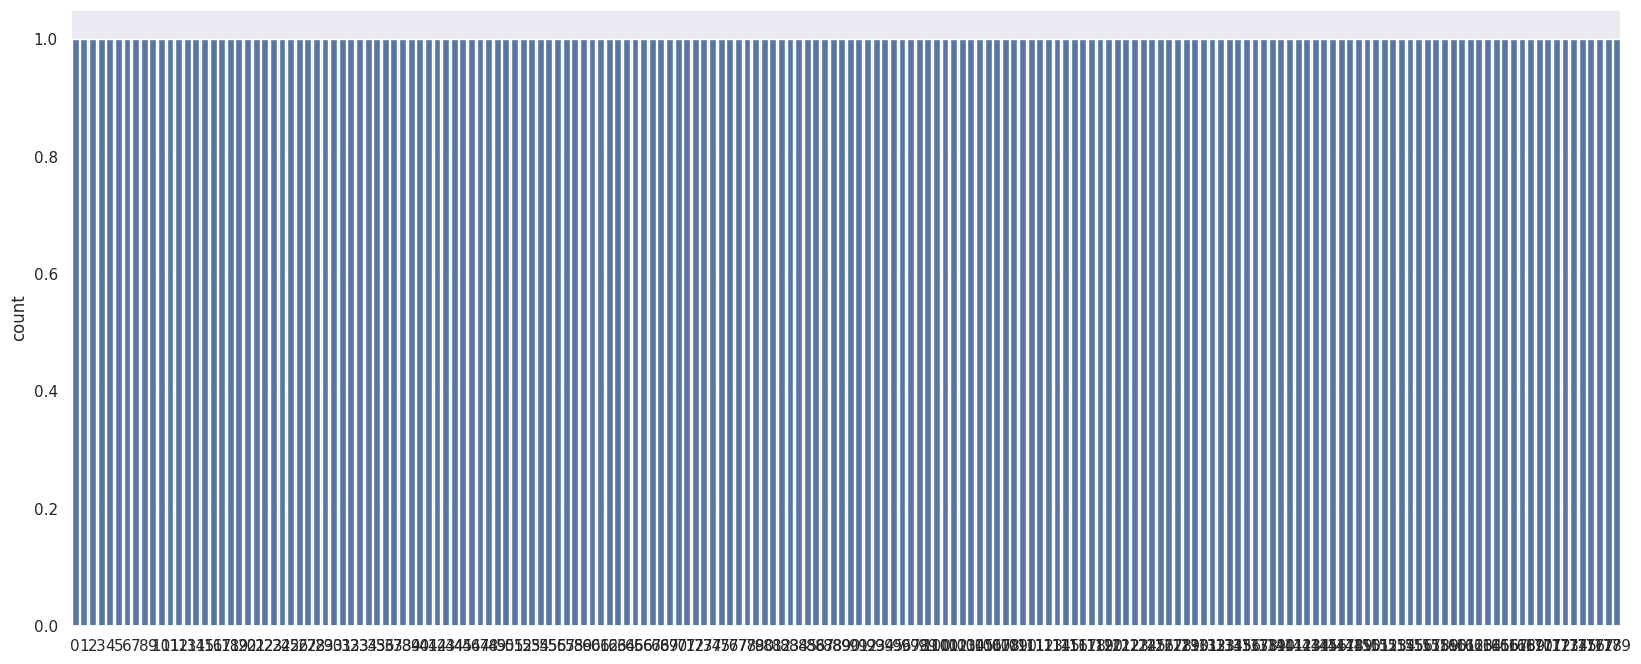

In [ ]:
#visualize the count

sns.countplot(df['heart_disease_present'])

ValueError: RGBA sequence should have length 3 or 4

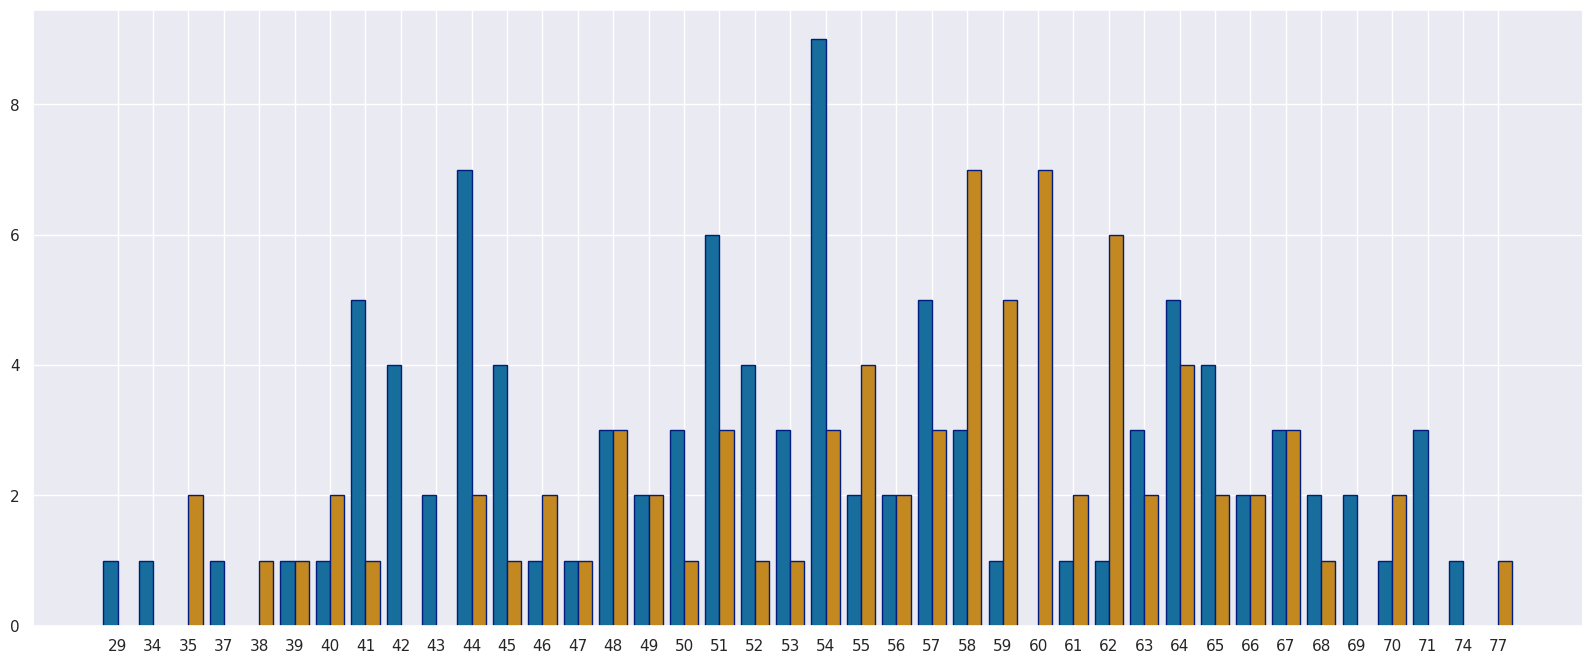

In [ ]:
#Look at the number of people with a heart disease that exceeds the number of people without a heart disease

#create a years column
# df['years']=(df['age']/365).round(0)
# df['years']=pd.to_numeric(df['years'],downcast='integer')

#visualize the data
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x='age',hue='heart_disease_present',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [ ]:
df=pd.get_dummies(df,columns=["thal"])
df

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,False,True,False
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,False,True,False
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,False,True,False
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,False,False,True
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,125,4,2,1,0,254,0.2,1,67,163,0,1,False,False,True
176,2s2b1f,2,180,4,0,0,1,327,3.4,0,55,117,1,1,False,True,False
177,nsd00i,2,125,3,0,0,0,309,1.8,1,64,131,1,1,False,False,True
178,0xw93k,1,124,3,2,1,0,255,0.0,1,48,175,0,0,False,True,False


In [ ]:
print(df.dtypes)


patient_id                               object
slope_of_peak_exercise_st_segment         int64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
thal_fixed_defect                          bool
thal_normal                                bool
thal_reversible_defect                     bool
dtype: object


In [ ]:
#Get the correlation of the columns
correlation_matrix = df.drop(columns=['patient_id']).corr()
print(correlation_matrix)

                                      slope_of_peak_exercise_st_segment  \
slope_of_peak_exercise_st_segment                              1.000000   
resting_blood_pressure                                         0.098287   
chest_pain_type                                                0.121207   
num_major_vessels                                              0.076832   
fasting_blood_sugar_gt_120_mg_per_dl                           0.050199   
resting_ekg_results                                            0.172191   
serum_cholesterol_mg_per_dl                                   -0.032348   
oldpeak_eq_st_depression                                       0.615948   
sex                                                            0.093340   
age                                                            0.169918   
max_heart_rate_achieved                                       -0.418102   
exercise_induced_angina                                        0.225459   
heart_disease_present    

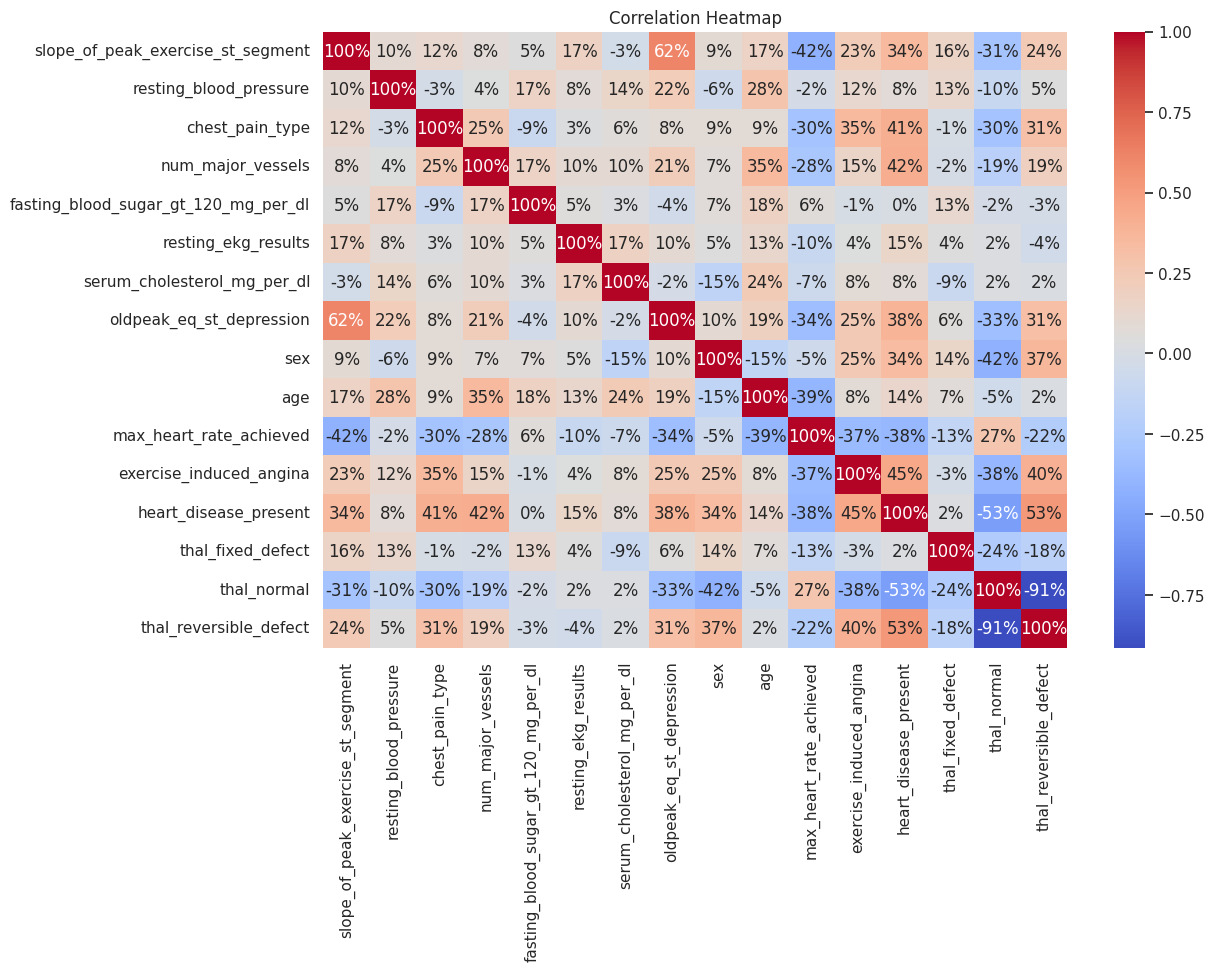

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['patient_id']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.0%', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Remove or drop the patient_id
df=df.drop('patient_id',axis=1)

In [ ]:
#split the data into feature data and target data
X=df.drop("heart_disease_present",axis=1)
Y=df["heart_disease_present"]

In [ ]:
#split the data again ,into 70%training data and 30%testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
#Feature Scaling
#Scale the values in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr=LogisticRegression(random_state=1)
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)

0.8888888888888888

In [ ]:
dtc=DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)

1.0

In [ ]:
knc=KNeighborsClassifier()
knc.fit(X_train,Y_train)
knc.score(X_train,Y_train)

0.8650793650793651

In [ ]:
#Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
#test the model accuracy on the training data set
model=forest
model.score(X_train,Y_train)

0.9841269841269841

In [ ]:
#Test the models accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,lr.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#Print the confusion matrix
print(cm)

#Print the models accuracy on the test data
print('Model Test Accuracy= {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[23  7]
 [ 8 16]]
Model Test Accuracy= 0.7222222222222222


In [ ]:
#Test the models accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,dtc.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#Print the confusion matrix
print(cm)

#Print the models accuracy on the test data
print('Model Test Accuracy= {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[23  7]
 [ 9 15]]
Model Test Accuracy= 0.7037037037037037


In [ ]:
#Test the models accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,knc.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#Print the confusion matrix
print(cm)

#Print the models accuracy on the test data
print('Model Test Accuracy= {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[24  6]
 [ 6 18]]
Model Test Accuracy= 0.7777777777777778


In [ ]:
#Test the models accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#Print the confusion matrix
print(cm)

#Print the models accuracy on the test data
print('Model Test Accuracy= {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[23  7]
 [ 9 15]]
Model Test Accuracy= 0.7037037037037037


In [ ]:
# Based on testing only
from sklearn.metrics import classification_report
print(classification_report(Y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.70      0.67      0.68        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54



In [ ]:
print(classification_report(Y_test,dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.68      0.62      0.65        24

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.70      0.70      0.70        54



In [ ]:
print(classification_report(Y_test,knc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



In [ ]:
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.68      0.62      0.65        24

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.70      0.70      0.70        54



In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
#load data
from  google.colab import files
uploaded = files.upload()

Saving merged_heart_disease_data.csv to merged_heart_disease_data.csv


In [ ]:
# Load and preprocess the dataset
df = pd.read_csv('merged_heart_disease_data.csv')
df = df.drop('patient_id', axis=1)

In [ ]:
# One-hot encode categorical features if needed (e.g., 'thal')
df = pd.get_dummies(df, columns=['thal'])

In [ ]:
# Split into features and target
X = df.drop('heart_disease_present', axis=1)
y = df['heart_disease_present']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
clf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Save the best model and scaler
joblib.dump(clf.best_estimator_, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    features = [float(x) for x in request.form.values()]
    final_features = np.array(features).reshape(1, -1)
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('heart_disease_model.pkl')
    final_features_scaled = scaler.transform(final_features)
    prediction = model.predict(final_features_scaled)
    result = 'Heart Disease Detected' if prediction[0] == 1 else 'No Heart Disease'
    return render_template('index.html', prediction_text='Prediction: {}'.format(result))

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
